# <center> Final Project

In [1]:
# Import necessary libraries

# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

### 1. Data loading and preprocessing

In [2]:
# Load the dataset
data_initial = pd.read_csv('winequality-red-4.csv')
data_initial.head(5)

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [3]:
# Split the header and the data
header = data_initial.columns[0].replace('"', '').split(';')

# Split the data
data = data_initial.iloc[:,0].str.split(';', expand=True)

# Transfrom the string data to float
data = data.astype(float)

# Assemble the data
data.columns = header
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


### 2. Exploratory Analysis of the Dataset

#### 2.1 Basic Statistics Analysis

In [4]:
# Basic statistics
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [27]:
data.describe().loc[['mean', 'std', 'min', 'max'], :].applymap(lambda x: f"{x:.3f}")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636,0.535
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808,0.499
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000,0.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000,1.000


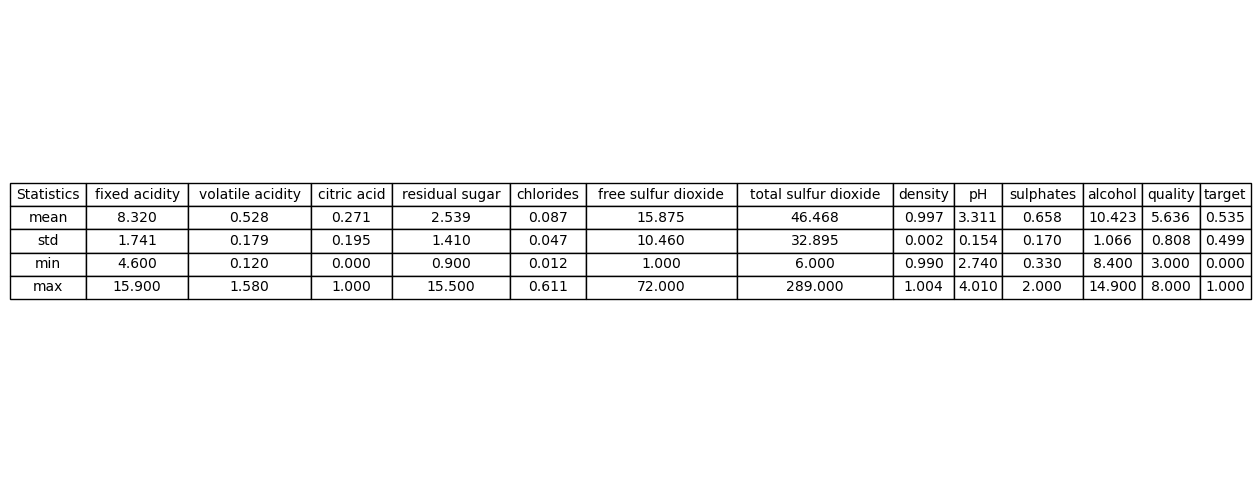

In [ ]:
# Creating the DataFrame
df = pd.DataFrame(data.describe().loc[['mean', 'std', 'min', 'max'], :].applymap(lambda x: f"{x:.3f}"))

# Make the index the first column
df.insert(0, 'Statistics', ['mean', 'std', 'min', 'max'])

# Plotting the table as an image
fig, ax = plt.subplots(figsize=(14, 6))
ax.axis('off')

# Create a table with adjusted column widths
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Styling the table
table.auto_set_font_size(False)
table.set_fontsize(10)

# Adjust column widths manually for better spacing
col_widths = [1] + [0.3] * (len(df.columns) - 1)
for i, width in enumerate(col_widths):
    table.auto_set_column_width(i)
    for key, cell in table.get_celld().items():
        if key[1] == i:
            cell.set_width(width)

# Adjust the row heights
for key, cell in table.get_celld().items():
    cell.set_height(0.05)

# Save the adjusted table as an image
plt.savefig("./images/statistics_table.png", bbox_inches='tight', dpi=1000)
plt.show()

#### 2.2 Missing Value and Outliers Detection

In [6]:
# Check for missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

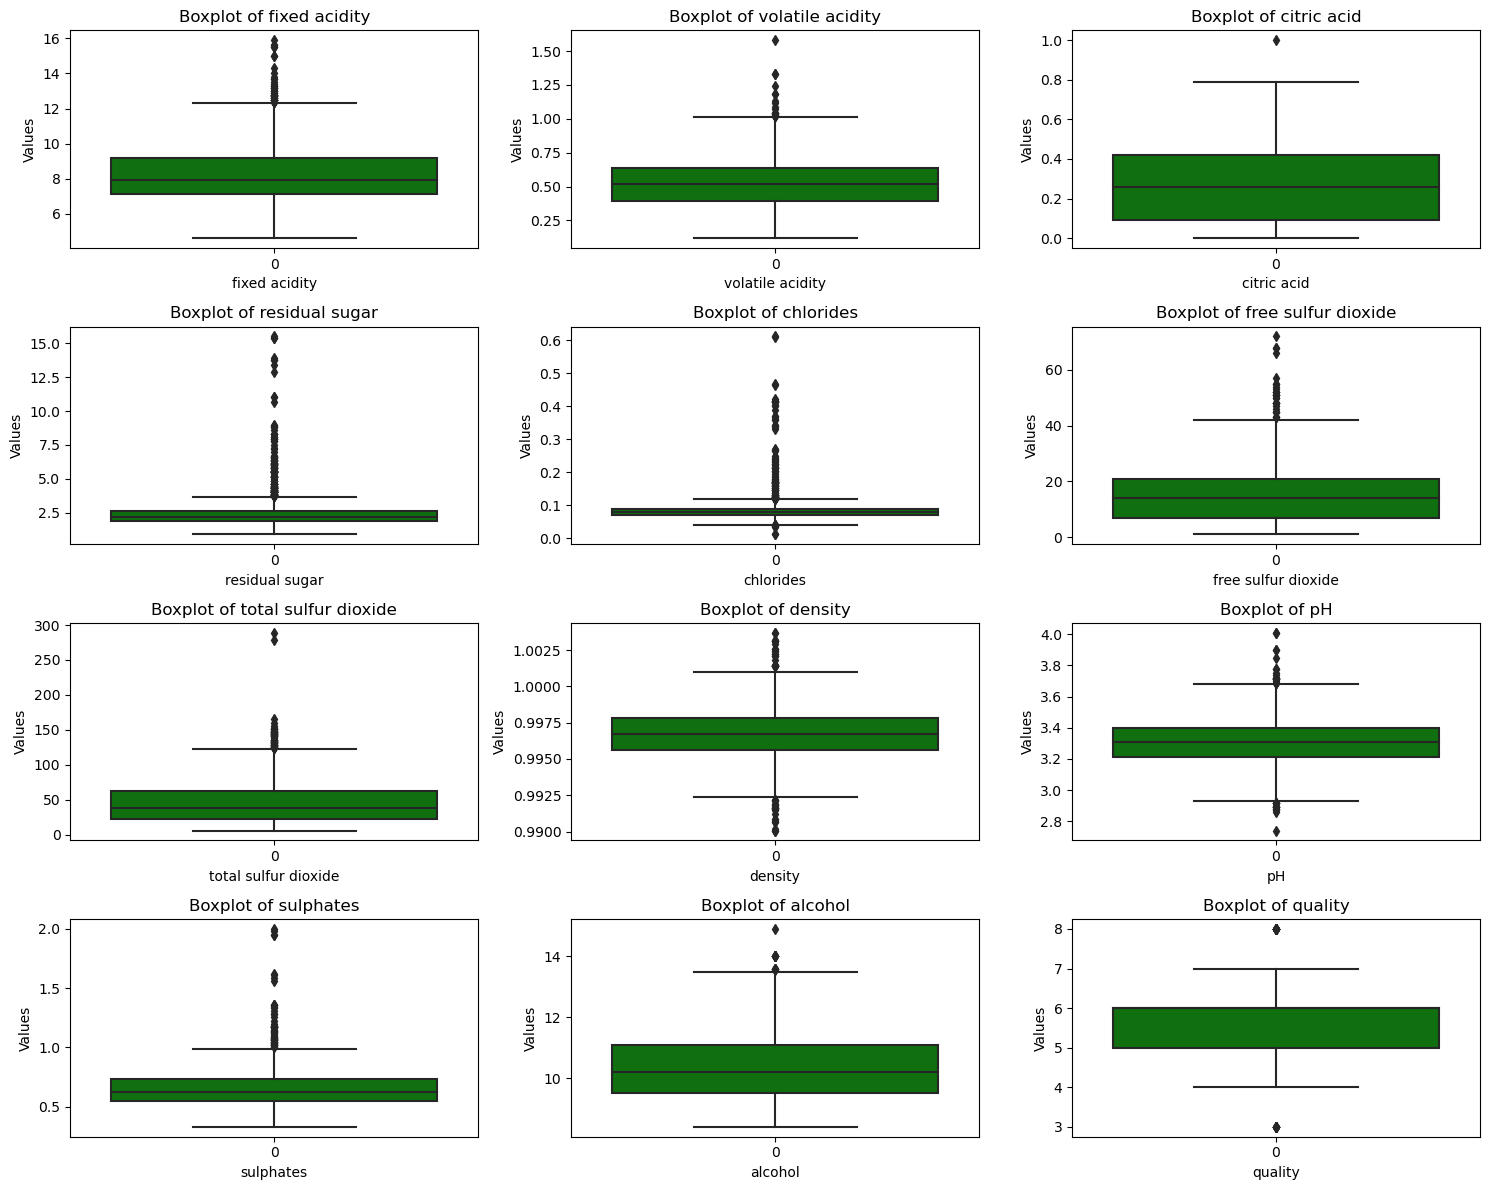

In [ ]:
# Boxplot of the data
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    sns.boxplot(data[column], color='g', ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Values")

plt.tight_layout()
plt.show()

In [8]:
# # Plot the boxplot of each feature
# for column in data.columns:
#     plt.figure(figsize=(6, 3))
#     sns.boxplot(data[column], color='g')
#     plt.title(f"Boxplot of {column}")
#     plt.xlabel(column)
#     plt.ylabel("values")
#     plt.show()

#### 2.3 Data distribution

In [9]:
# # Distribution of quality (target value), which is from 0 to 10
# sns.countplot(x='quality', data=data)
# plt.title("Quality Distribution")
# plt.show()

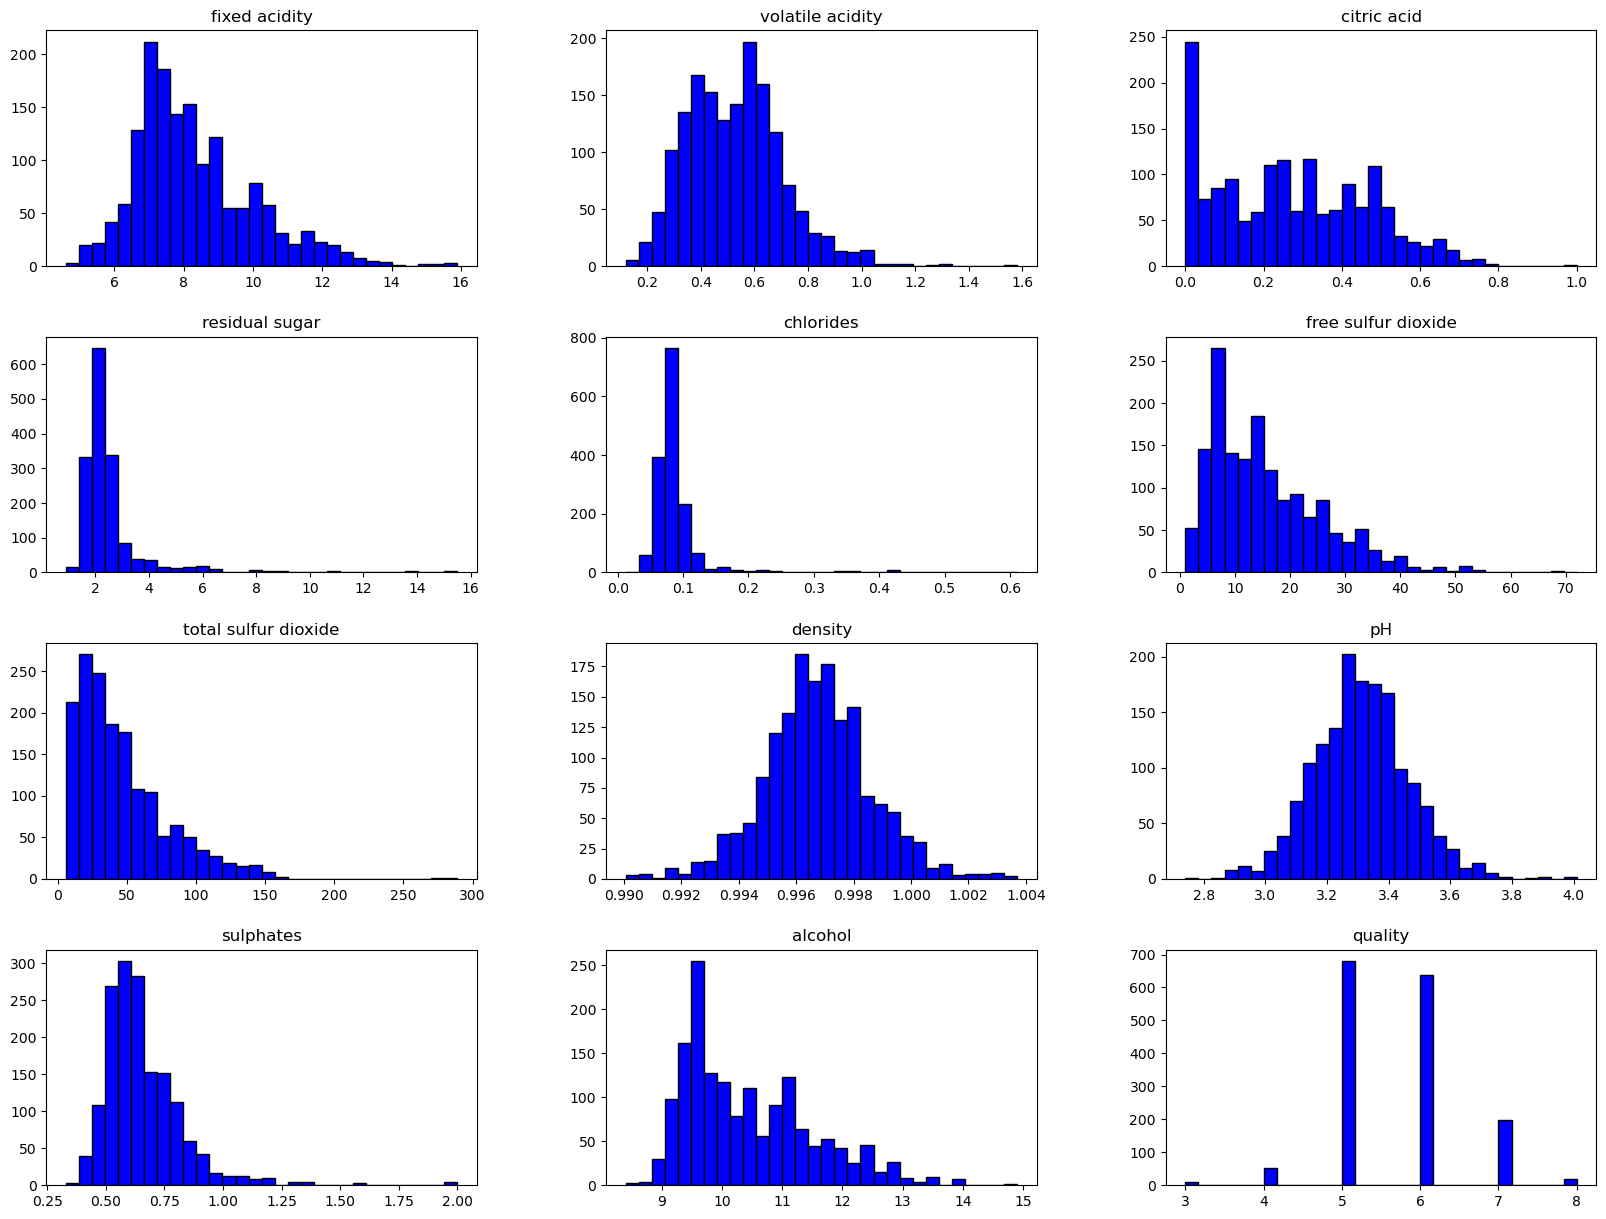

In [10]:
# Plot all the distributions of these features use colorful histograms
data.hist(bins=30, figsize=(20, 15), color='b', edgecolor='black', linewidth=1.0, grid=False)
plt.show()

In [11]:
# # Plot distribution of each feature separately
# for column in data.columns:
#     plt.figure(figsize=(6, 3))
#     plt.hist(data[column], bins=20, color='b', edgecolor='black', linewidth=1.0)
#     plt.title(f"Histogram of {column}")
#     plt.xlabel(column)
#     plt.ylabel("Frequency")
#     plt.show()

#### 2.4 Feature Correlation Analysis

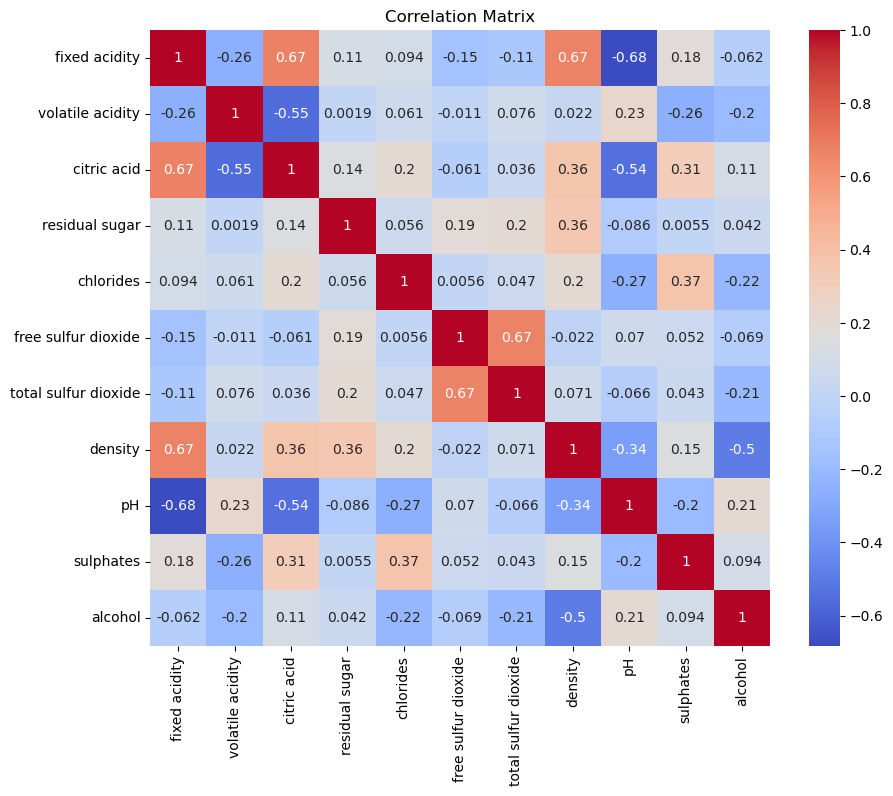

In [12]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### 3. Constructing target values, data spliting, and standardization

In [13]:
# Divide the quality into two classes, low quality (0) and high quality (1), based on the threshold 6
data['target'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0


In [14]:
# Separate the features and the target
X = data.drop(['quality', 'target'], axis=1)
y = data['target']

# print(X.head(5))
# print(y.head(5))
# print(X.shape)
# print(y.shape)

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Data standardization
# We must standardize the data after splitting the data into training and testing sets to avoid data leakage.
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

### 4. Training Models

#### 4.1 Decision Tree

In [16]:
# Decision Tree Classifier - Baseline model
dt_baseline = DecisionTreeClassifier(random_state=0, criterion='entropy')
dt_baseline.fit(X_train, y_train)

y_pred_baseline = dt_baseline.predict(X_test)
decision_tree_baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print("Baseline Decision Tree Accuracy:", accuracy_score(y_test, y_pred_baseline))
print(classification_report(y_test, y_pred_baseline))
print(confusion_matrix(y_test, y_pred_baseline))

Baseline Decision Tree Accuracy: 0.746875
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       148
           1       0.77      0.76      0.76       172

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

[[109  39]
 [ 42 130]]


In [17]:
# Decision Tree Classifier - Hyperparameter tuning and cross-validation
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 8, 16],
    'min_samples_leaf': [1, 2, 4, 8, 10, 12],
}

grid_search = GridSearchCV(dt_baseline, param_grid, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Params from GridSearch:", grid_search.best_params_)
print("Best CV Score from GridSearch:", grid_search.best_score_)

dt_best = grid_search.best_estimator_
y_pred_best = dt_best.predict(X_test)
decision_tree_best_accuracy = accuracy_score(y_test, y_pred_best)

print("Best Decision Tree Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

Best Params from GridSearch: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 2}
Best CV Score from GridSearch: 0.7302604166666666
Best Decision Tree Accuracy: 0.753125
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       148
           1       0.77      0.78      0.77       172

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

[[107  41]
 [ 38 134]]


#### 4.2 Random Forest

In [18]:
# Random Forest Classifier - Baseline Model
rf_baseline = RandomForestClassifier(random_state=0)
rf_baseline.fit(X_train, y_train)

y_pred_baseline = rf_baseline.predict(X_test)
random_forest_baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print("Baseline Random Forest Accuracy:", accuracy_score(y_test, y_pred_baseline))
print(classification_report(y_test, y_pred_baseline))
print(confusion_matrix(y_test, y_pred_baseline))

Baseline Random Forest Accuracy: 0.821875
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       148
           1       0.84      0.83      0.83       172

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320

[[121  27]
 [ 30 142]]


In [19]:
# Random Forest Classifier - Hyperparameter tuning and cross-validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 4, 8]
}

grid_search = GridSearchCV(rf_baseline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Params from GridSearch:", grid_search.best_params_)
print("Best CV Score from GridSearch:", grid_search.best_score_)

rf_best = grid_search.best_estimator_
y_pred_best = rf_best.predict(X_test)
random_forest_best_accuracy = accuracy_score(y_test, y_pred_best)

print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

Best Params from GridSearch: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score from GridSearch: 0.795171568627451
Best Random Forest Accuracy: 0.825
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       148
           1       0.85      0.83      0.84       172

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.83      0.82      0.83       320

[[122  26]
 [ 30 142]]


#### 4.3 Support Vector Machine

In [20]:
# Support Vector Machine Classifier - Baseline Model
svm_baseline = SVC(random_state=0)
svm_baseline.fit(X_train, y_train)

y_pred_baseline = svm_baseline.predict(X_test)
svm_baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print("Baseline SVM Accuracy:", accuracy_score(y_test, y_pred_baseline))
print(classification_report(y_test, y_pred_baseline))
print(confusion_matrix(y_test, y_pred_baseline))

Baseline SVM Accuracy: 0.7625
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       148
           1       0.78      0.78      0.78       172

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320

[[109  39]
 [ 37 135]]


In [21]:
# Support Vector Machine Classifier - Hyperparameter tuning, regularization, and cross-validation
param_grid = {
    'C': [0.1, 1, 5],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'poly', 'linear'], 
    'degree': [2, 3, 4]
}

grid_search_svc = GridSearchCV(svm_baseline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score=0)
grid_search_svc.fit(X_train, y_train)

print("Best Params from GridSearch for SVM:", grid_search_svc.best_params_)
print("Best CV Score from GridSearch for SVM:", grid_search_svc.best_score_)

svm_best = grid_search_svc.best_estimator_
y_pred_best = svm_best.predict(X_test)
svm_best_accuracy = accuracy_score(y_test, y_pred_best)

print("Best SVM Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

Best Params from GridSearch for SVM: {'C': 5, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Score from GridSearch for SVM: 0.7552634803921568
Best SVM Accuracy: 0.778125
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       148
           1       0.79      0.80      0.80       172

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320

[[111  37]
 [ 34 138]]


#### 4.4 Artificial Neural Networks

In [22]:
# Multi-Layer Perceptron Classifier - Baseline Model
mlp_baseline = MLPClassifier(max_iter=2000, random_state=0)
mlp_baseline.fit(X_train, y_train)

y_pred_baseline = mlp_baseline.predict(X_test)
ann_baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print("Baseline MLP Accuracy:", accuracy_score(y_test, y_pred_baseline))
print(classification_report(y_test, y_pred_baseline))
print(confusion_matrix(y_test, y_pred_baseline))

Baseline MLP Accuracy: 0.765625
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       148
           1       0.77      0.81      0.79       172

    accuracy                           0.77       320
   macro avg       0.77      0.76      0.76       320
weighted avg       0.77      0.77      0.76       320

[[105  43]
 [ 32 140]]


In [23]:
# Multi-Layer Perceptron Classifier - Hyperparameter tuning, regularization, and cross-validation
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,), 
                           (50, 50), (100, 50), (100, 100)],
    'activation': ['relu'],  
    'solver': ['adam'],      
    'alpha': [0.0001, 0.001, 0.01],  
    'learning_rate': ['adaptive'],   
    'learning_rate_init': [0.001, 0.01]  
}

mlp = MLPClassifier(max_iter=1000, early_stopping=True, random_state=0)

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  
    verbose=2,
    n_jobs=-1  
)

grid_search.fit(X_train, y_train)

print("Best parameter:", grid_search.best_params_)
print("Best cross validation accuracy", grid_search.best_score_)

best_mlp = grid_search.best_estimator_
y_pred_best = best_mlp.predict(X_test)
ann_best_accuracy = accuracy_score(y_test, y_pred_best)

print("Best ann accuracy", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameter: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'adam'}
Best cross validation accuracy 0.7638786764705883
Best ann accuracy 0.796875
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       148
           1       0.83      0.78      0.81       172

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320

[[120  28]
 [ 37 135]]


### 5. Results and Analysis

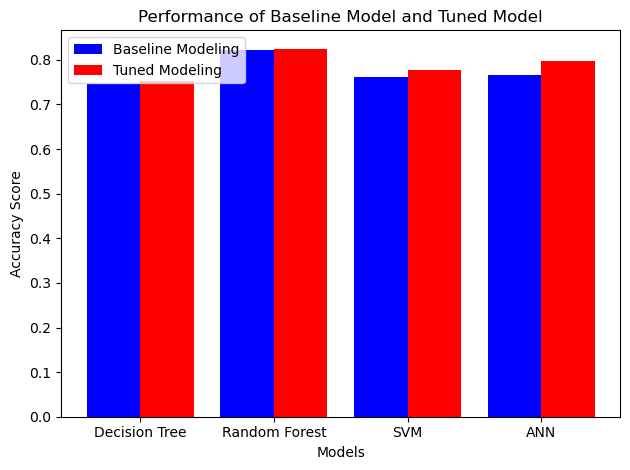

In [24]:
# Construct a dictionary to store the accuracy of each model
results = {'Decision Tree': [decision_tree_baseline_accuracy, decision_tree_best_accuracy],
           'Random Forest': [random_forest_baseline_accuracy, random_forest_best_accuracy],
           'SVM': [svm_baseline_accuracy, svm_best_accuracy],
           'ANN': [ann_baseline_accuracy, ann_best_accuracy]}

# Transform the dictionary to a list
models = list(results.keys())
normal_model = [results[model][0] for model in models]
tuned_model = [results[model][1] for model in models]

# Plot the barchart
x = np.arange(len(models))
width = 0.4
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, normal_model, width, label='Baseline Modeling', color='b')
bars2 = ax.bar(x + width/2, tuned_model, width, label='Tuned Modeling', color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy Score')
ax.set_title('Performance of Baseline Model and Tuned Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()